In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
enc = LabelEncoder()

In [10]:
df["Gender"] = enc.fit_transform(df["Gender"])

In [12]:
df["Gender"].unique()

array([0, 1])

In [13]:
df["Geography"] = enc.fit_transform(df["Geography"])

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [16]:
len(df["Surname"].unique())

2932

In [18]:
x = df.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1).values

In [21]:
x[:5]

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, 4.2000000e+01,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, 4.1000000e+01,
        1.0000000e+00, 8.3807860e+04, 1.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, 4.2000000e+01,
        8.0000000e+00, 1.5966080e+05, 3.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       [6.9900000e+02, 0.0000000e+00, 0.0000000e+00, 3.9000000e+01,
        1.0000000e+00, 0.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.3826630e+04],
       [8.5000000e+02, 2.0000000e+00, 0.0000000e+00, 4.3000000e+01,
        2.0000000e+00, 1.2551082e+05, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 7.9084100e+04]])

In [24]:
y = df["Exited"].values

In [25]:
y[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [26]:
model = LogisticRegression()

In [27]:
model.fit(x, y)

LogisticRegression()

In [28]:
model.coef_

array([[-5.03263588e-03,  2.79244067e-04, -1.03747870e-03,
         4.37547113e-02, -1.58914980e-03,  3.62617908e-06,
        -4.45436842e-04, -1.86571334e-04, -1.41598420e-03,
        -1.36036127e-06]])

In [30]:
pred = model.predict(x)

In [31]:
pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [32]:
y[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import *

In [34]:
# correct prediction/ total predictions
accuracy_score(y, pred)

0.7898

In [35]:
# mse
mean_squared_error(y, pred)

0.2102

In [36]:
confusion_matrix(y, pred)

array([[7784,  179],
       [1923,  114]], dtype=int64)

c:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


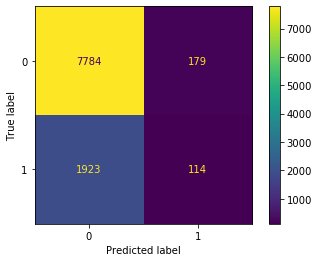

In [37]:
plot_confusion_matrix(model, x, y)

In [ ]:
# recall, precision, f1-score

# f1-score --> harmonic mean of recall and precision

# f1-score --> 2 * precison * recall / (precision + recall)

In [38]:
recall_score(y, pred)

0.055964653902798235

In [39]:
precision_score(y, pred)

0.3890784982935154

In [40]:
f1_score(y, pred)

0.09785407725321889

In [42]:
print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      7963
           1       0.39      0.06      0.10      2037

    accuracy                           0.79     10000
   macro avg       0.60      0.52      0.49     10000
weighted avg       0.72      0.79      0.72     10000

